In [1]:
import sys

sys.path.append("../..")

from src.data_loaders.datasets import Datasets, DatasetOnTheFly
from src.models.models import XGBoostModel
from src.data_loaders.rollcall import get_individual_votes_with_party_enriched_lobby

df = Datasets.V5.get_dataset()[2]
print(df.columns)

getting ind vote data joining w/ subjects
Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/rollcall_cleaned_11.parquet
Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/rollcall_crs_policy_11.parquet


/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/notebooks/../../src/data_loaders/rollcall.py:396: DtypeWarning: Columns (10,12,15,16,17,41,43,44,45,47,49,50,54,55,58,59,60,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  lobby_df = pd.read_csv(get_data_root() / "dime_recipients_1979_2024.csv")


Index(['vote_for', 'icpsr', 'congress', 'chamber', 'session', 'd', 'r',
       'terms_served', 'pct_pop', 'prior_votes_for_bill', 'state_icpsr',
       'district_code', 'personal_cfscore', 'contributor_cfscore',
       'composite_cfscore', 'num_contributors', 'num_contributions',
       'ind_contributions', 'pac_contributions', 'party_contributions',
       'amount_spent', 'primary_election_pct', 'general_election_pct',
       'gender', 'vote_type_amend', 'vote_type_cloture', 'vote_type_concur',
       'vote_type_conference', 'vote_type_pass', 'vote_type_recommit',
       'vote_type_suspend', 'vote_type_table', 'vote_type_veto',
       'crs_policy_area_agriculture_and_food', 'crs_policy_area_animals',
       'crs_policy_area_armed_forces_and_national_security',
       'crs_policy_area_arts_culture_religion',
       'crs_policy_area_civil_rights_and_liberties_minority_issues',
       'crs_policy_area_commerce', 'crs_policy_area_congress',
       'crs_policy_area_crime_and_law_enforcemen

In [2]:
default_kwargs = {
    "n_estimators": 100,
    "max_depth": 6,
    "learning_rate": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
}
XGBoostModel(dataset=DatasetOnTheFly(df=df, target="vote_for"), kwargs_for_model=default_kwargs, verbose=False).run_model()

/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:40:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[Cache] Saved results to /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/model/xgboost_tmp_618853bc-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8_11.parquet


,,accuracy,precision,recall,f1,roc_auc,runtime
model_name,model_id,,,,,,
xgboost,tmp_666825f6-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8,0.842004,0.842278,0.965507,0.899693,0.89121,5.249952


In [3]:
# dropping ICPSR has very little impact on our metrics -- remove due to high cardinality
XGBoostModel(dataset=DatasetOnTheFly(df=df.drop(columns=["icpsr"]), target="vote_for"), kwargs_for_model=default_kwargs, verbose=False).run_model()

/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[Cache] Saved results to /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/model/xgboost_tmp_66872758-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8_11.parquet


,,accuracy,precision,recall,f1,roc_auc,runtime
model_name,model_id,,,,,,
xgboost,tmp_6b5df19e-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8,0.840705,0.841219,0.965105,0.898914,0.890691,5.243206


In [4]:
vote_for_df = df.merge(df.groupby("icpsr")["vote_for"].mean().to_frame('avg_vote_for').reset_index(), on="icpsr")
XGBoostModel(dataset=DatasetOnTheFly(df=vote_for_df.drop(columns="icpsr"), target="vote_for"), kwargs_for_model=default_kwargs, verbose=False).run_model()

/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[Cache] Saved results to /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/model/xgboost_tmp_6be41a94-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8_11.parquet


,,accuracy,precision,recall,f1,roc_auc,runtime
model_name,model_id,,,,,,
xgboost,tmp_70bbb57c-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8,0.84003,0.84098,0.964371,0.898459,0.8915,5.28619


In [5]:
# cheating
cheating_df = df.copy()
cheating_df["cheating"] = df["vote_for"]
XGBoostModel(dataset=DatasetOnTheFly(df=cheating_df, target="vote_for"), kwargs_for_model=default_kwargs, verbose=False).run_model()

/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[Cache] Saved results to /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/model/xgboost_tmp_711d2406-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8_11.parquet


,,accuracy,precision,recall,f1,roc_auc,runtime
model_name,model_id,,,,,,
xgboost,tmp_7548a6c2-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8,1.0,1.0,1.0,1.0,1.0,4.208352


<Axes: >

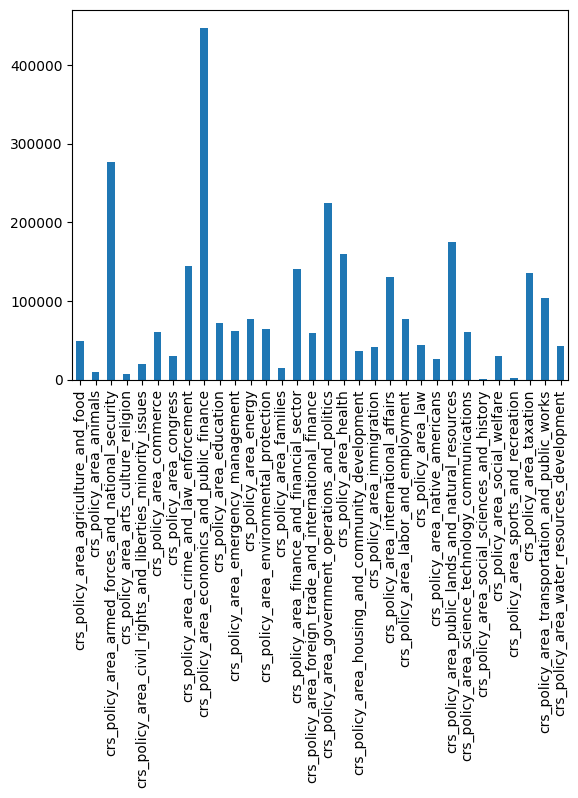

In [6]:
df[[c for c in df.columns if c.startswith("crs_policy")]].sum().plot.bar()

Index(['crs_policy_area_armed_forces_and_national_security',
       'crs_policy_area_commerce', 'crs_policy_area_crime_and_law_enforcement',
       'crs_policy_area_economics_and_public_finance',
       'crs_policy_area_education', 'crs_policy_area_emergency_management',
       'crs_policy_area_energy', 'crs_policy_area_environmental_protection',
       'crs_policy_area_finance_and_financial_sector',
       'crs_policy_area_foreign_trade_and_international_finance',
       'crs_policy_area_government_operations_and_politics',
       'crs_policy_area_health', 'crs_policy_area_international_affairs',
       'crs_policy_area_labor_and_employment',
       'crs_policy_area_public_lands_and_natural_resources',
       'crs_policy_area_science_technology_communications',
       'crs_policy_area_taxation',
       'crs_policy_area_transportation_and_public_works'],
      dtype='object') Index(['crs_policy_area_agriculture_and_food', 'crs_policy_area_animals',
       'crs_policy_area_arts_culture_

<Axes: >

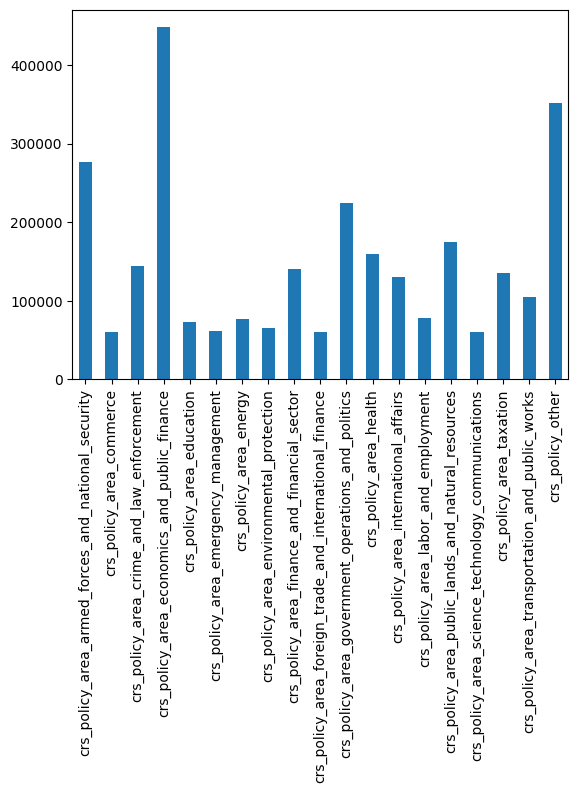

In [7]:
min_threshold = 50_000
policy_counts = df[[c for c in df.columns if c.startswith("crs_policy")]].sum()
print(policy_counts.loc[policy_counts > min_threshold].index, policy_counts.loc[policy_counts <= min_threshold].index)
consolidated_policy_areas = policy_counts.loc[policy_counts <= min_threshold].index
consolidated_df = df.copy()
consolidated_df["crs_policy_other"] = consolidated_df[consolidated_policy_areas].sum(axis=1)
consolidated_df = consolidated_df.drop(columns=consolidated_policy_areas)
consolidated_df[[c for c in consolidated_df.columns if c.startswith("crs_policy")]].sum().plot.bar()

In [8]:
XGBoostModel(dataset=DatasetOnTheFly(df=consolidated_df.drop(columns="icpsr"), target="vote_for"), kwargs_for_model=default_kwargs, verbose=False).run_model()

/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:41:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[Cache] Saved results to /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/model/xgboost_tmp_7685ebc6-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8_11.parquet


,,accuracy,precision,recall,f1,roc_auc,runtime
model_name,model_id,,,,,,
xgboost,tmp_7a9551de-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8,0.839144,0.840249,0.964114,0.89793,0.889683,4.337412


In [9]:
raw_df = get_individual_votes_with_party_enriched_lobby()
raw_df.columns

getting ind vote data joining w/ subjects
Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/rollcall_cleaned_11.parquet
Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/rollcall_crs_policy_11.parquet


/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/notebooks/../../src/data_loaders/rollcall.py:396: DtypeWarning: Columns (10,12,15,16,17,41,43,44,45,47,49,50,54,55,58,59,60,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  lobby_df = pd.read_csv(get_data_root() / "dime_recipients_1979_2024.csv")


Index(['date', 'bill_number', 'vote_passed', 'vote_type_amend',
       'vote_type_cloture', 'vote_type_concur', 'vote_type_conference',
       'vote_type_pass', 'vote_type_recommit', 'vote_type_suspend',
       ...
       'composite_cfscore', 'num_contributors', 'num_contributions',
       'ind_contributions', 'pac_contributions', 'party_contributions',
       'amount_spent', 'primary_election_pct', 'general_election_pct',
       'gender'],
      dtype='object', length=116)

In [10]:
republican_votes = raw_df.loc[raw_df["r"] == 1].groupby("bill_number")["vote_for"].sum().to_frame('r_votes')
democrat_votes = raw_df.loc[raw_df["d"] == 1].groupby("bill_number")["vote_for"].sum().to_frame('d_votes')
total_votes = raw_df.groupby("bill_number")["vote_for"].sum().to_frame('total_votes')
votes_df = total_votes.join(republican_votes.join(democrat_votes))
votes_df["r_pct"] = votes_df["r_votes"] / votes_df["total_votes"]
votes_df["d_pct"] = votes_df["d_votes"] / votes_df["total_votes"]
votes_df["r_majority"] = votes_df["r_pct"] >= .5
votes_df["d_majority"] = votes_df["d_pct"] >= .5
votes_df

,total_votes,r_votes,d_votes,r_pct,d_pct,r_majority,d_majority
bill_number,,,,,,,
hjres1,2828,1921,905,0.679279,0.320014,True,False
hjres100,413,207,204,0.501211,0.493947,True,False
hjres101,330,64,264,0.193939,0.800000,False,True
hjres102,847,425,420,0.501771,0.495868,True,False
hjres103,421,229,190,0.543943,0.451306,True,False
...,...,...,...,...,...,...,...
sjres55,411,158,252,0.384428,0.613139,False,True
sjres6,223,206,16,0.923767,0.071749,True,False
sjres7,98,46,52,0.469388,0.530612,False,True


In [11]:
raw_df

date bill_number  \
congress session chamber rollnumber icpsr                            
101      2.0     0       371        633.0   1990-01-24      hr2712   
                                    1077.0  1990-01-24      hr2712   
                                    1087.0  1990-01-24      hr2712   
                                    2009.0  1990-01-24      hr2712   
                                    2605.0  1990-01-24      hr2712   
...                                                ...         ...   
115      2.0     1       350        49308.0 2018-01-29       s2311   
                                    49703.0 2018-01-29       s2311   
                                    49706.0 2018-01-29       s2311   
                                    94659.0 2018-01-29       s2311   
                                    99912.0 2018-01-29       s2311   

                                             vote_passed  vote_type_amend  \
congress session chamber rollnumber icpsr                                   
101      2.0     0       371        633.0              1                0   
                                    1077.0             1                0   
                                    1087.0             1                0   
                                    2009.0             1                0   
                                    2605.0             1                0   
...                                                  ...              ...   
115      2.0     1       350        49308.0            0                0   
                                    49703.0            0                0   
                                    49706.0            0                0   
                                    94659.0            0                0   
                                    99912.0            0                0   

                                             vote_type_cloture  \
congress session chamber rollnumber icpsr                        
101      2.0     0       371        633.0                    0   
                                    1077.0                   0   
                                    1087.0                   0   
                                    2009.0                   0   
                                    2605.0                   0   
...                                                        ...   
115      2.0     1       350        49308.0                  1   
                                    49703.0                  1   
                                    49706.0                  1   
                                    94659.0                  1   
                                    99912.0                  1   

                                             vote_type_concur  \
congress session chamber rollnumber icpsr                       
101      2.0     0       371        633.0                   0   
                                    1077.0                  0   
                                    1087.0                  0   
                                    2009.0                  0   
                                    2605.0                  0   
...                                                       ...   
115      2.0     1       350        49308.0                 0   
                                    49703.0                 0   
                                    49706.0                 0   
                                    94659.0                 0   
                                    99912.0                 0   

                                             vote_type_conference  \
congress session chamber rollnumber icpsr                           
101      2.0     0       371        633.0                       0   
                                    1077.0                      0   
                                    1087.0                      0   
                                    2009.0                      0   
                  

In [12]:
tmp = raw_df.reset_index().merge(votes_df[["r_majority", "d_majority"]].reset_index(), on="bill_number")
tmp["party_aligned"] = ((tmp["r"] == 1) & (tmp["r_majority"])) | ((tmp["d"] == 1) & (tmp["d_majority"]))
party_alignment = tmp.groupby('icpsr')['party_aligned'].mean().reset_index()
party_aligned_df = df.merge(party_alignment, on="icpsr")

In [13]:
XGBoostModel(dataset=DatasetOnTheFly(df=party_aligned_df.drop(columns="icpsr"), target="vote_for"), kwargs_for_model=default_kwargs, verbose=False).run_model()

/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:41:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[Cache] Saved results to /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/model/xgboost_tmp_8bf64302-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8_11.parquet


,,accuracy,precision,recall,f1,roc_auc,runtime
model_name,model_id,,,,,,
xgboost,tmp_917649c6-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8,0.839558,0.839486,0.966099,0.898353,0.888824,5.836841


In [ ]:
from src.data_loaders.rollcall import get_training_data_v6

df_v6 = get_training_data_v6()[-1]
default_kwargs = {
    "n_estimators": 500,
    "max_depth": 8,
    "learning_rate": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
}
XGBoostModel(dataset=DatasetOnTheFly(df=df_v6.drop(columns="icpsr"), target="vote_for"), kwargs_for_model=default_kwargs, verbose=False).run_model()

getting ind vote data joining w/ subjects
Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/rollcall_cleaned_11.parquet
Loading cached data from /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/rollcall_crs_policy_11.parquet


/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/notebooks/../../src/data_loaders/rollcall.py:396: DtypeWarning: Columns (10,12,15,16,17,41,43,44,45,47,49,50,54,55,58,59,60,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  lobby_df = pd.read_csv(get_data_root() / "dime_recipients_1979_2024.csv")
/Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/env/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[Cache] Saved results to /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/model/xgboost_tmp_a1a2fdf8-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8_11.parquet


,,accuracy,precision,recall,f1,roc_auc,runtime
model_name,model_id,,,,,,
xgboost,tmp_a96ec5ee-4ee8-11f0-965e-b61dc5758fad_n_estimators_100_max_depth_6_learning_rate_0.1_subsample_0.8_colsample_bytree_0.8,0.847901,0.847107,0.967338,0.903239,0.902728,8.415837
